In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
u=np.zeros((1001,1001))#1001 by 1001 grid points

In [71]:
x=np.linspace(0,1,1001)
t=np.linspace(0,10,1001)
#Chosen grid shape
print("x coord :",x)
print("time coord :",t)

x coord : [0.    0.001 0.002 ... 0.998 0.999 1.   ]
time coord : [ 0.    0.01  0.02 ...  9.98  9.99 10.  ]


a=0.05 m/s  
$\Delta t = $0.01 s  
CFL=$\frac{0.05\times 0.01}{0.001}=0.5$

In this demo we chose sin curve in 0,1 to Demonstrate FTBS  
**sin($\pi$x)  0<x<1**

In [80]:
u[0,:]=np.sin(np.pi*x)#Initial condition specified

In [81]:
u#Initial values of u

array([[0.00000000e+00, 3.14158749e-03, 6.28314397e-03, ...,
        6.28314397e-03, 3.14158749e-03, 1.22464680e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

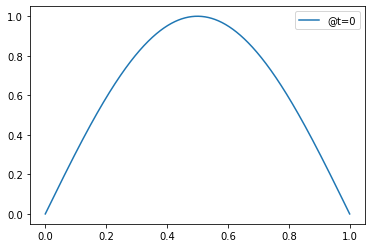

In [82]:
#Visualisation
#@t=0
plt.plot(x,u[0,:],label='@t=0')
plt.legend()
plt.show()

In [66]:
def FTBS(U,CFL):
    for i in range(len(U[:,0])-1):
        U[i+1,0]=U[i,0]-CFL*(U[i,0]-U[i,-1])#Ensures Periodic Boundary condition or, The wave is stationary and localized type without this BC the wave will not remain in between 0 and 1
        for j in range(len(U[0,:])-1):
            U[i+1,j+1]=U[i,j+1]-CFL*(U[i,j+1]-U[i,j])#Time marching steps
    return U        

In [83]:
FTBS(u,0.5)#FTBS called with CFL set to 0.5

array([[0.00000000e+00, 3.14158749e-03, 6.28314397e-03, ...,
        6.28314397e-03, 3.14158749e-03, 1.22464680e-16],
       [6.12323400e-17, 1.57079374e-03, 4.71236573e-03, ...,
        7.85389120e-03, 4.71236573e-03, 1.57079374e-03],
       [7.85396871e-04, 7.85396871e-04, 3.14157973e-03, ...,
        9.42461518e-03, 6.28312846e-03, 3.14157973e-03],
       ...,
       [9.98749809e-01, 9.98725166e-01, 9.98690665e-01, ...,
        9.98764595e-01, 9.98769524e-01, 9.98764595e-01],
       [9.98757202e-01, 9.98737487e-01, 9.98707916e-01, ...,
        9.98757202e-01, 9.98767060e-01, 9.98767060e-01],
       [9.98762131e-01, 9.98747345e-01, 9.98722702e-01, ...,
        9.98747345e-01, 9.98762131e-01, 9.98767060e-01]])

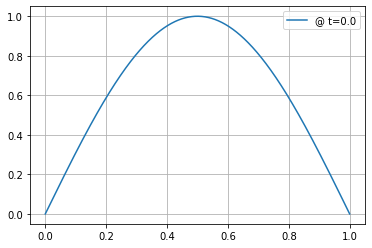

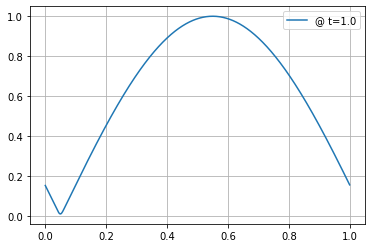

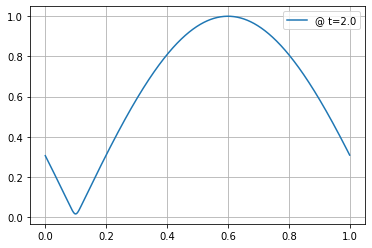

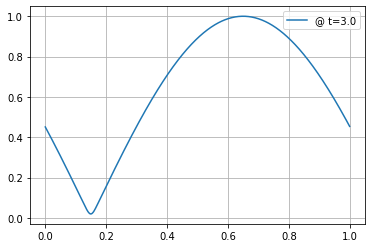

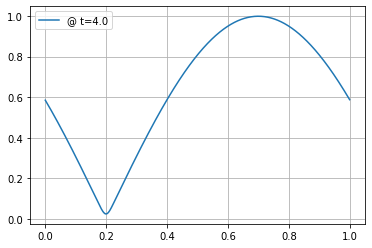

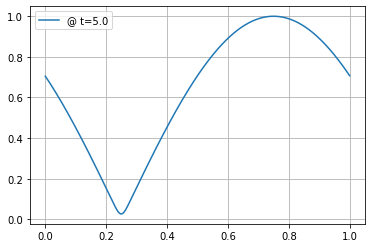

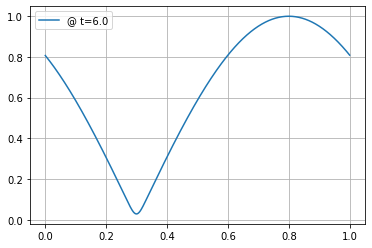

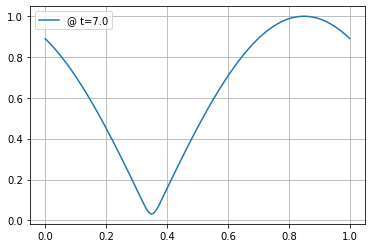

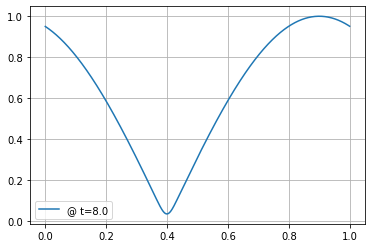

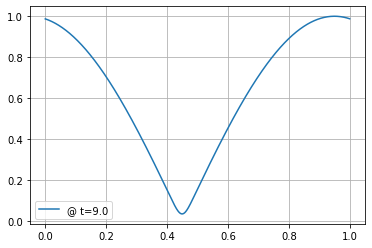

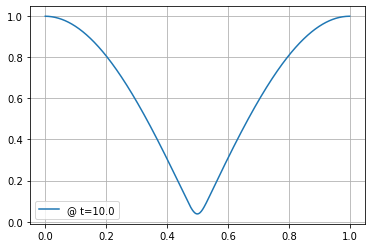

In [84]:
a=np.arange(0,1001,100)
for i in a:
    plt.plot(x,u[i,:],label="@ t={}".format(i/100))#Plots are in every 1 sec
    plt.grid()
    plt.legend()
    plt.show()

at the junction of segments sin(x-at) is not exactly zero. Its due to error coming from higher order derivatives coming from the fact of not setting CFL=1

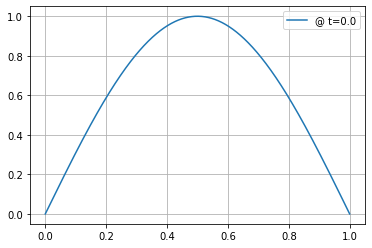

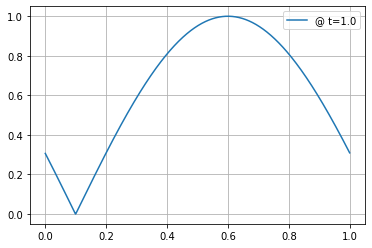

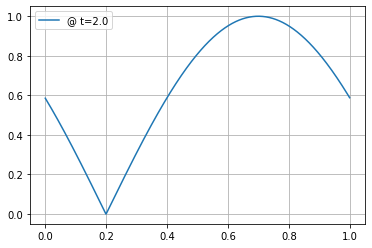

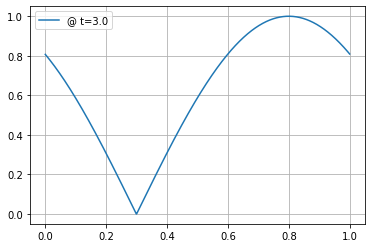

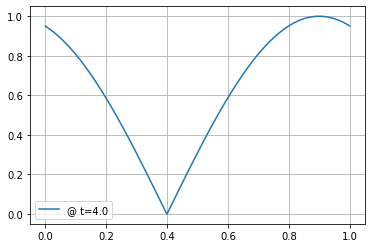

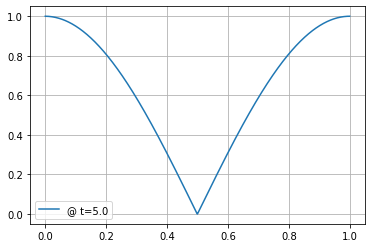

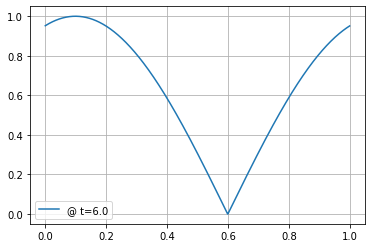

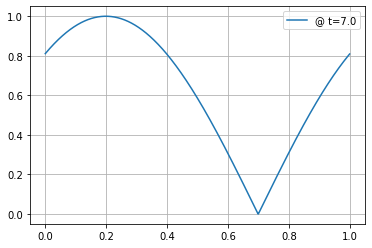

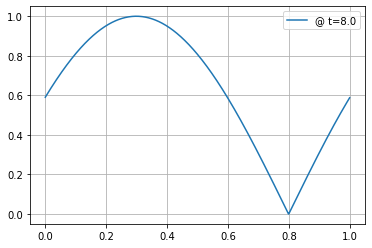

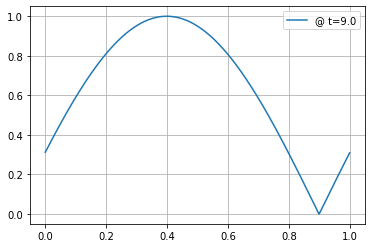

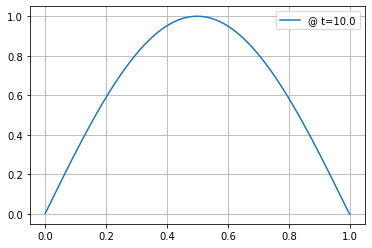

In [78]:
u=np.zeros((1001,1001))#1001 by 1001 grid points
u[0,:]=np.sin(np.pi*x)#Initial condition specified
FTBS(u,1)#CFL
a=np.arange(0,1001,100)
for i in a:
    plt.plot(x,u[i,:],label="@ t={}".format(i/100))#Plots are in every 1 sec
    plt.grid()
    plt.legend()
    plt.show()

Exact property of sine curve is retained for selecting CFL 1

**Unit Step function Demo @ CFL =1 and 0.5**

In [75]:
v=np.zeros((1001,1001))

In [76]:
v[0,1:]=1

In [42]:
FTBS(v,1)#CFL=1

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

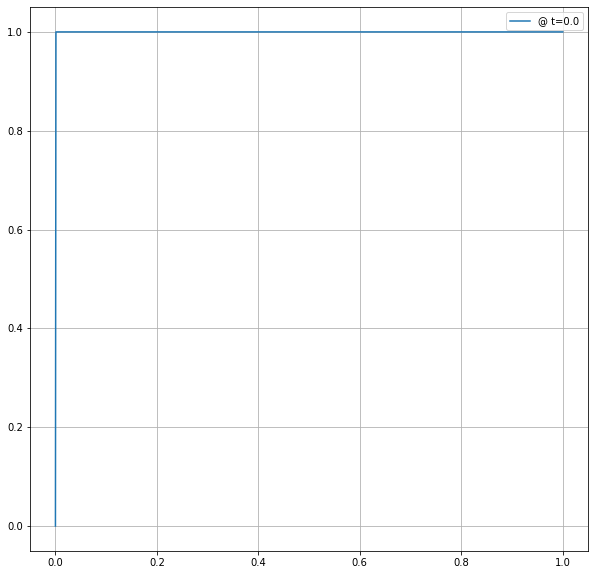

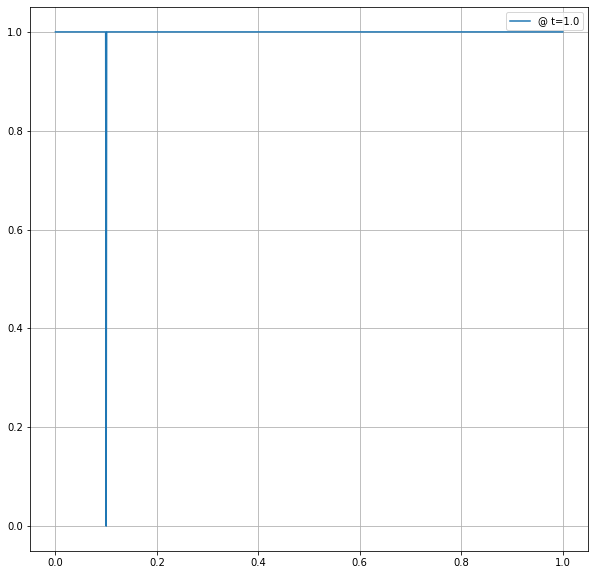

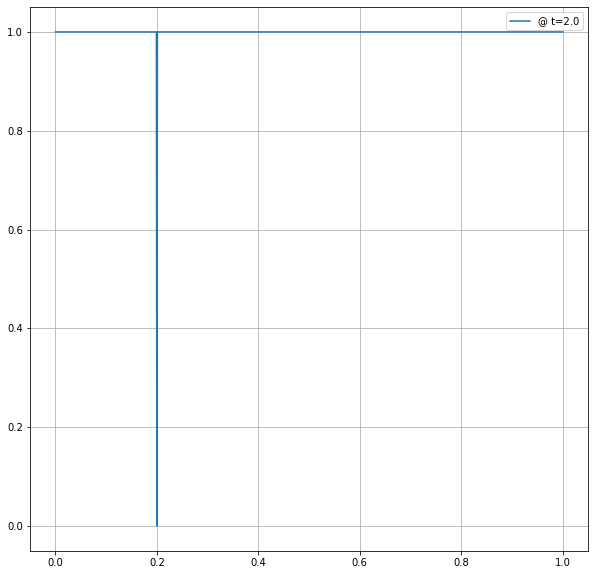

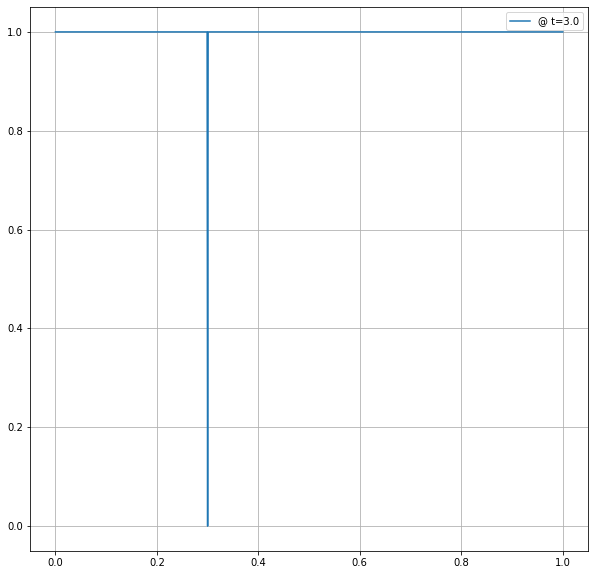

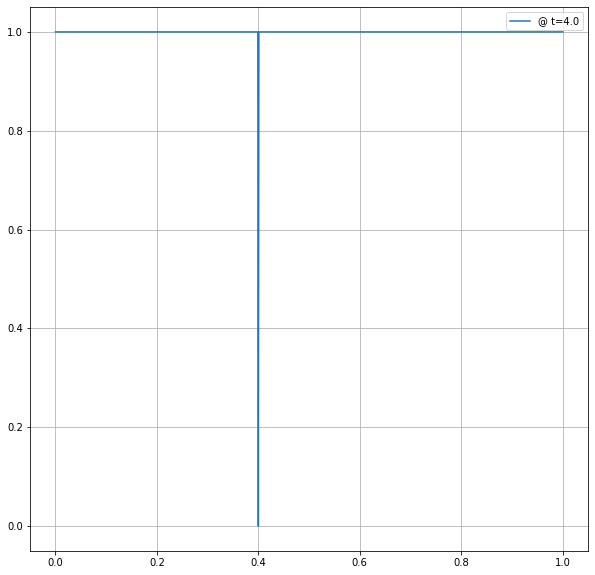

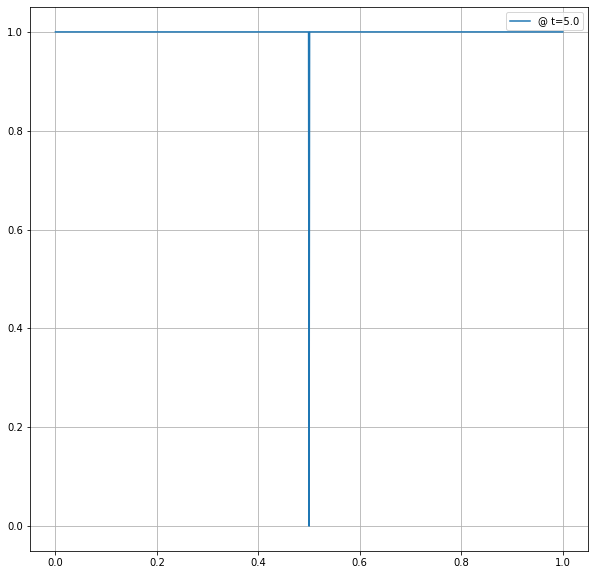

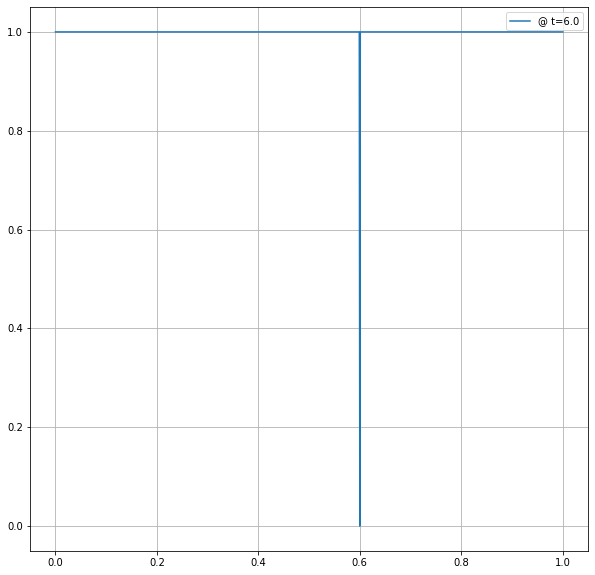

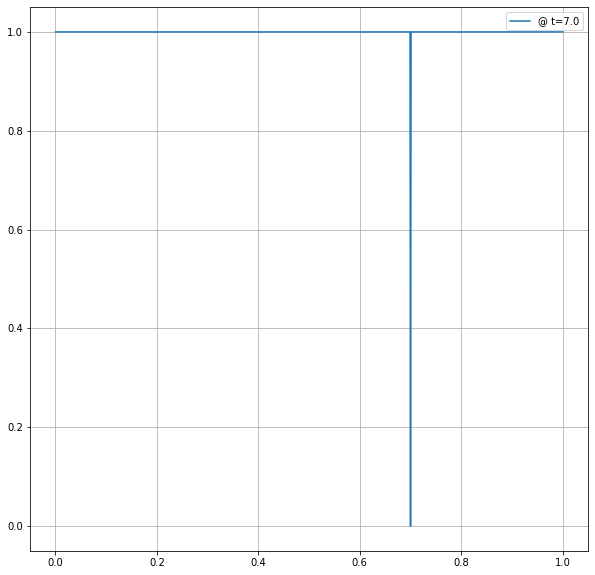

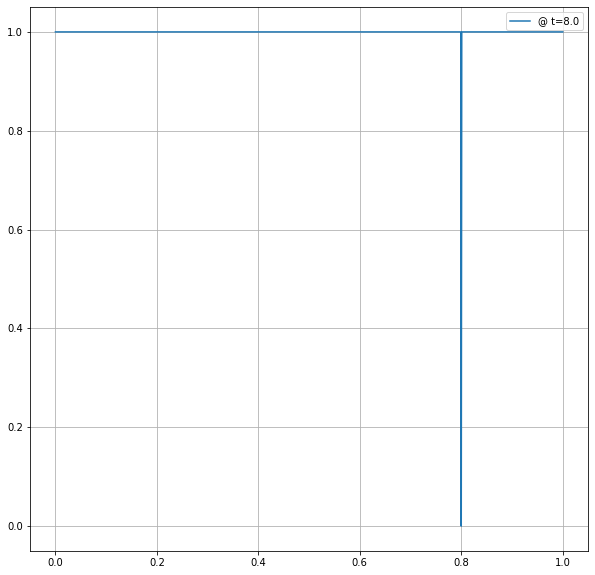

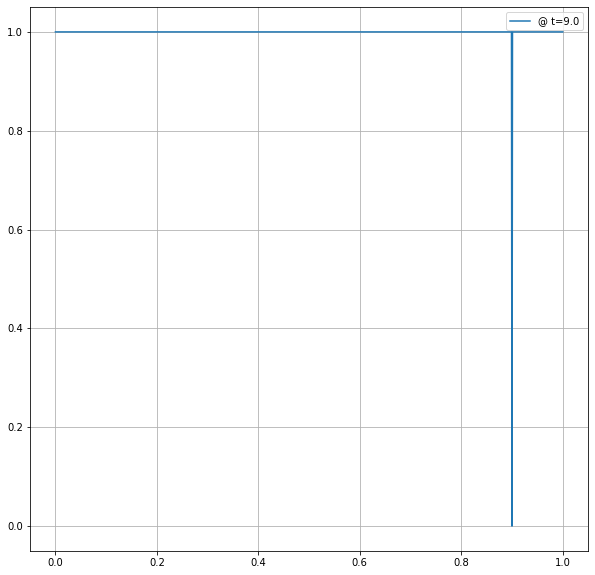

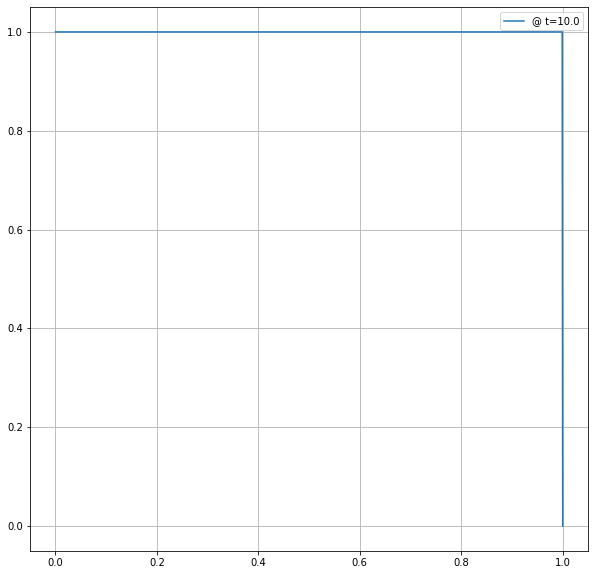

In [43]:
a=np.arange(0,1001,100)
for i in a:
    plt.figure(figsize=(10,10))
    plt.plot(x,v[i,:],label="@ t={}".format(i/100))
    plt.grid()
    plt.legend()
    plt.show()

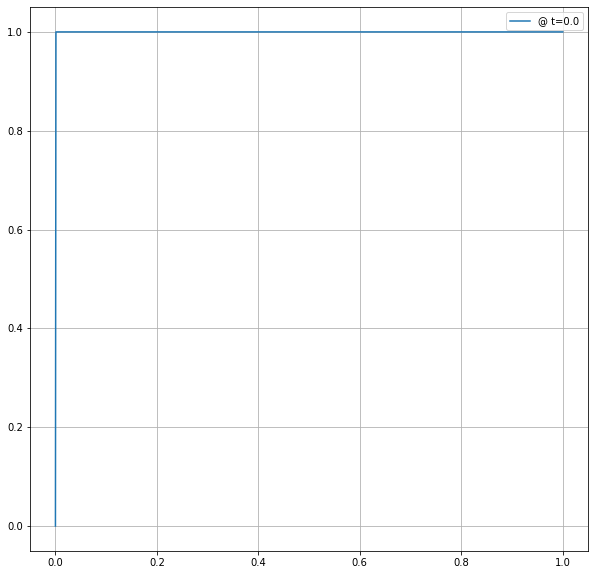

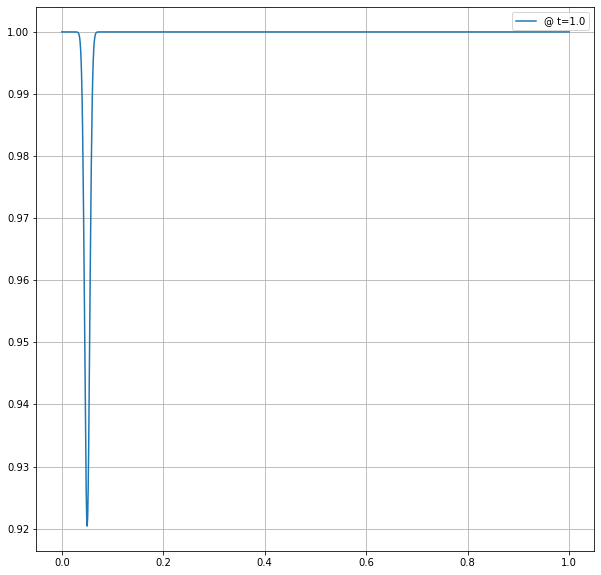

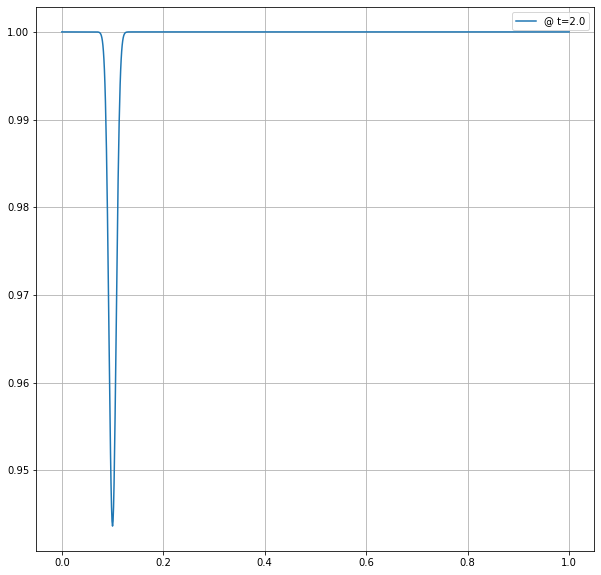

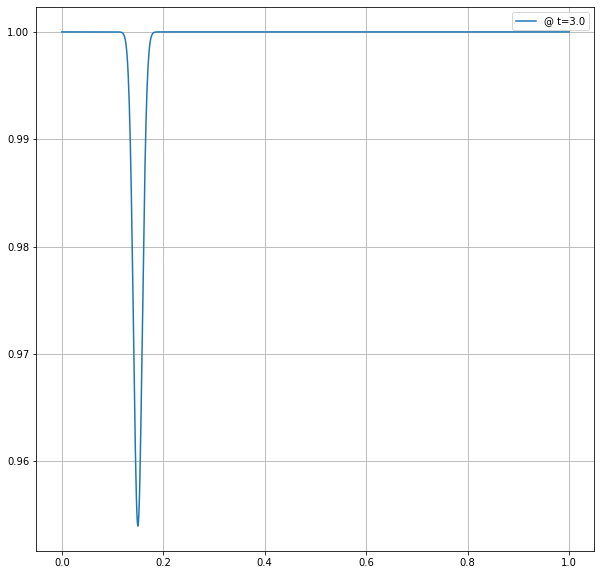

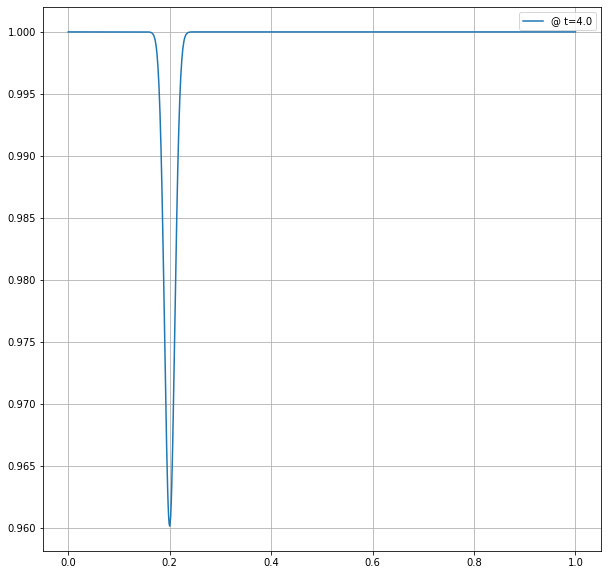

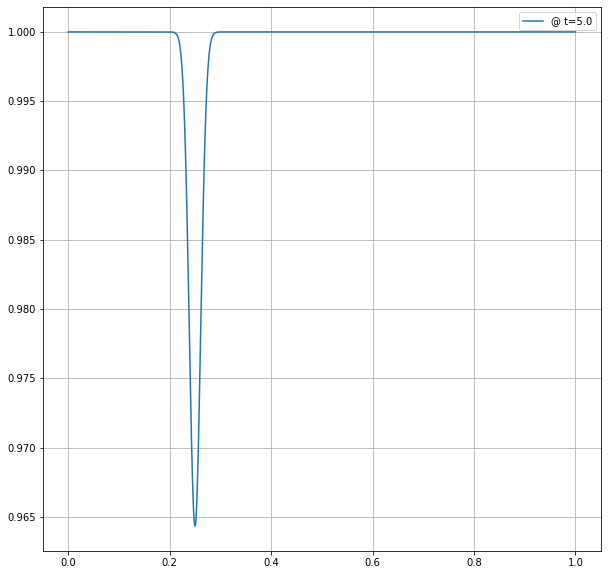

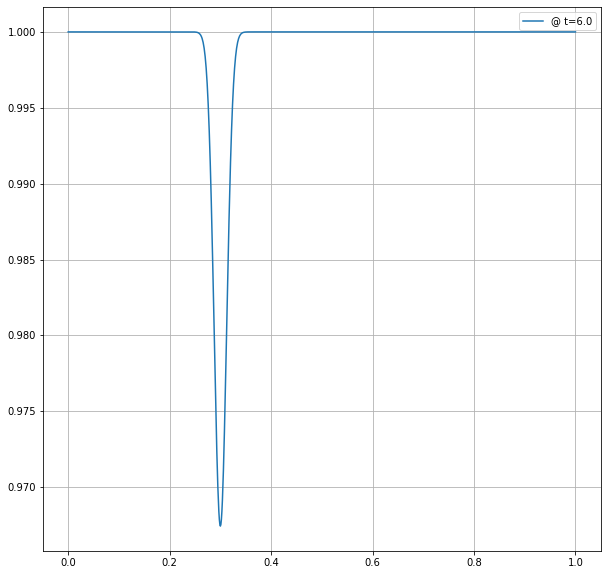

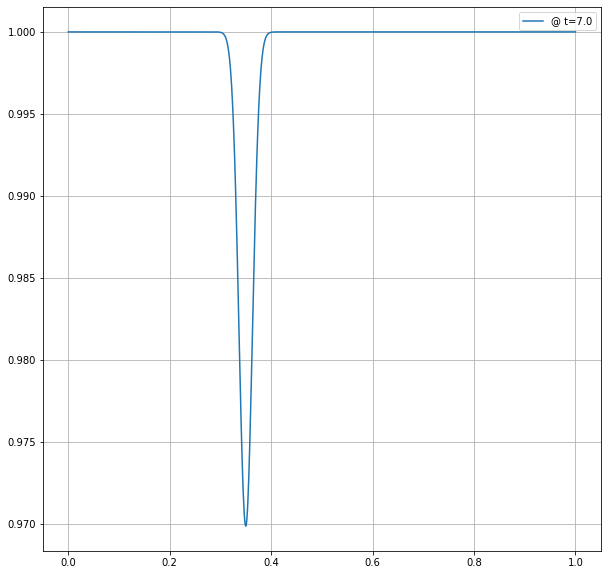

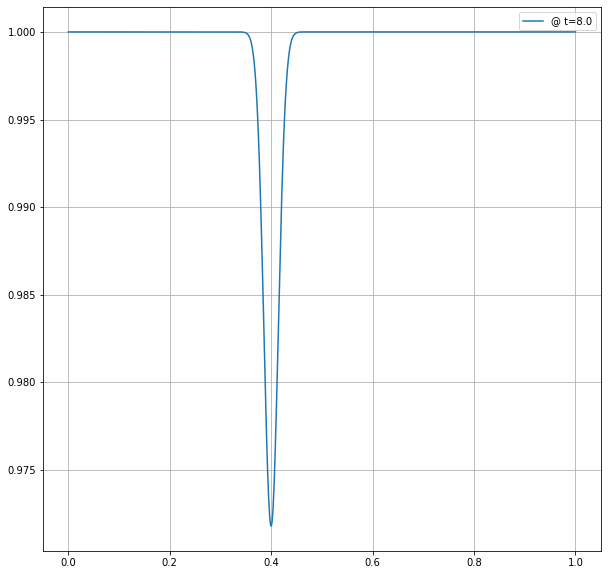

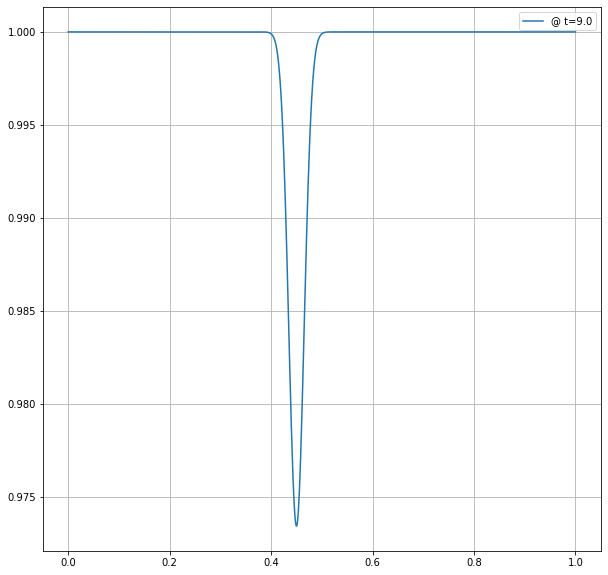

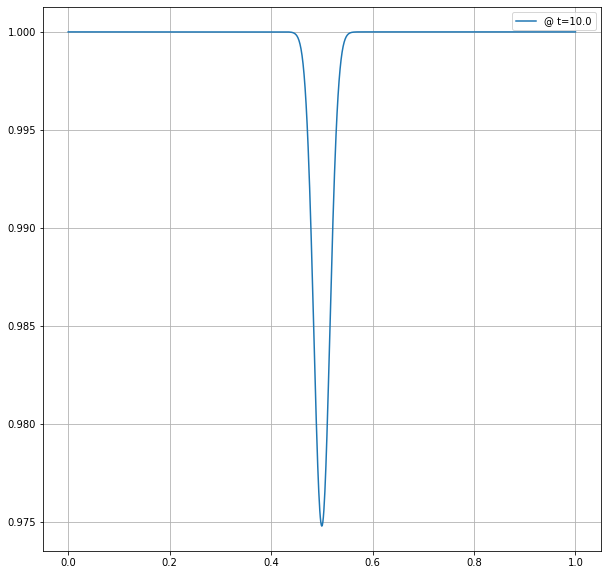

In [85]:
v=np.zeros((1001,1001))
v[0,1:]=1
FTBS(v,0.5)#CFL=0.5
a=np.arange(0,1001,100)
for i in a:
    plt.figure(figsize=(10,10))#Wave shape is distorted as we march to higher time. This proves FTBS is exact only for CFL = 1
    plt.plot(x,v[i,:],label="@ t={}".format(i/100))
    plt.grid()
    plt.legend()
    plt.show()